<a href="https://colab.research.google.com/github/mokshanandam/CodSoft/blob/main/generic_churn_prediction_engine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')


In [ ]:

print(df.head())


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [ ]:

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.fillna(df['TotalCharges'].mean(), inplace=True)


df.drop(['customerID'], axis=1, inplace=True)


In [ ]:

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.fillna(df['TotalCharges'].mean(), inplace=True)


if 'customerID' in df.columns:

    df.drop(['customerID'], axis=1, inplace=True)
    print("Dropped 'customerID' column.")
else:
    print("'customerID' column not found. It might have been dropped already.")

'customerID' column not found. It might have been dropped already.


In [ ]:
from sklearn.preprocessing import LabelEncoder


label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    if col != 'Churn':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le


In [ ]:

df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})


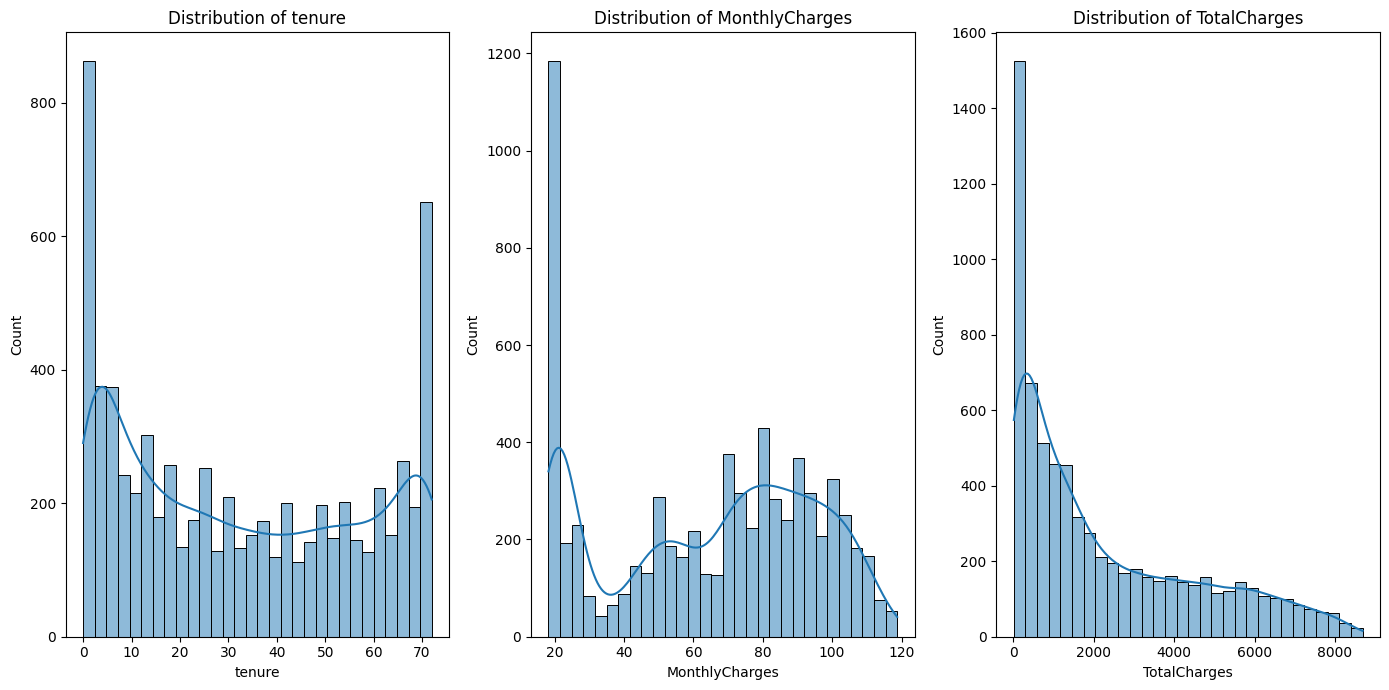

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(14, 7))
for i, col in enumerate(['tenure', 'MonthlyCharges', 'TotalCharges'], 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split


X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results[name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'report': classification_report(y_test, y_pred),
        'conf_matrix': confusion_matrix(y_test, y_pred)
    }


best_model_name = max(results, key=lambda k: results[k]['accuracy'])
best_model_accuracy = results[best_model_name]['accuracy']


for name, result in results.items():
    print(f'\nModel: {name}')
    print(f'Accuracy: {result["accuracy"]:.2f}')
    print('Classification Report:')
    print(result['report'])

print(f'\nBest Model: {best_model_name}')
print(f'Best Accuracy: {best_model_accuracy:.2f}')



Model: Logistic Regression
Accuracy: 0.82
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409


Model: Support Vector Machine
Accuracy: 0.81
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.92      0.87      1036
           1       0.68      0.50      0.58       373

    accuracy                           0.81      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409


Model: Random Forest
Accuracy: 0.79
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.65      0.47      0.5

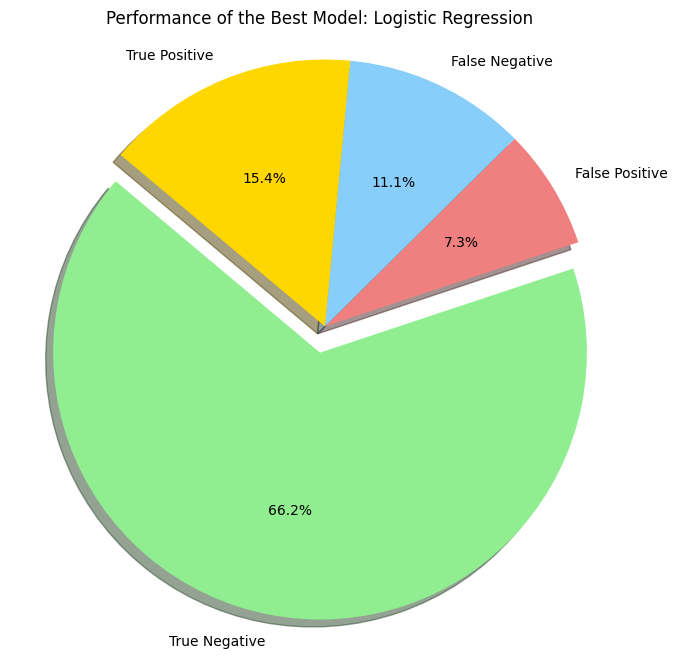

In [ ]:
import matplotlib.pyplot as plt


conf_matrix = results[best_model_name]['conf_matrix']

true_neg, false_pos, false_neg, true_pos = conf_matrix.ravel()
total = true_neg + false_pos + false_neg + true_pos

labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
sizes = [true_neg / total, false_pos / total, false_neg / total, true_pos / total]
colors = ['lightgreen', 'lightcoral', 'lightskyblue', 'gold']
explode = (0.1, 0, 0, 0)  # explode the True Positive slice

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title(f'Performance of the Best Model: {best_model_name}')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


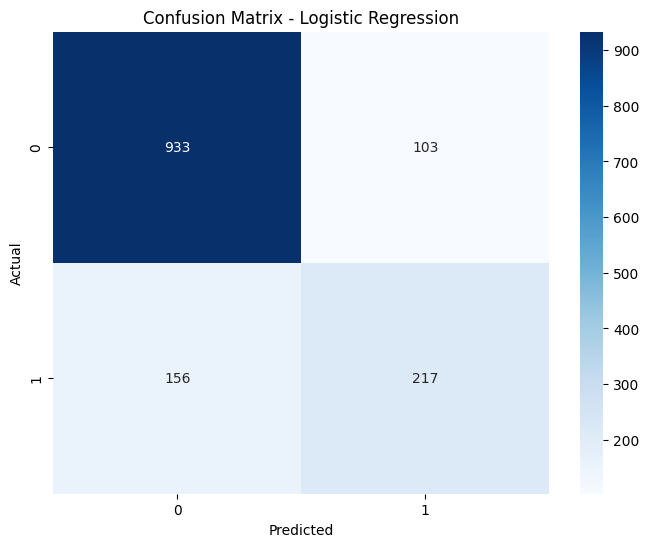

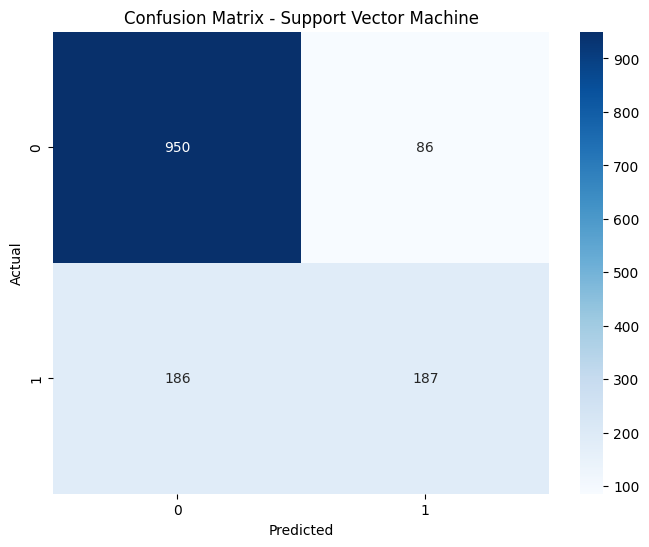

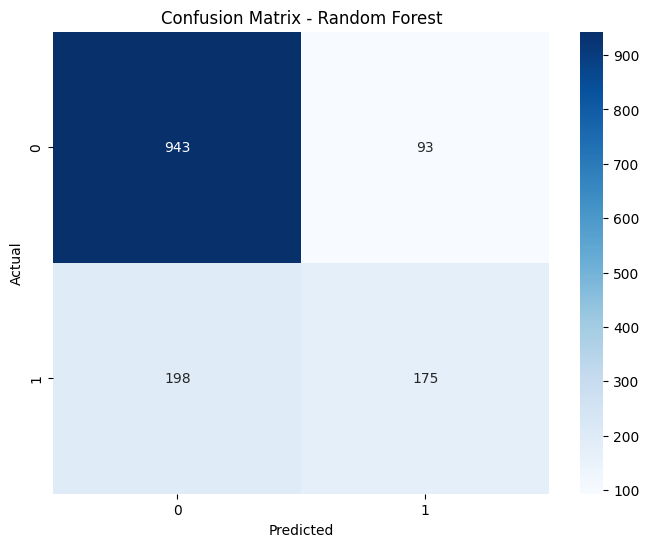

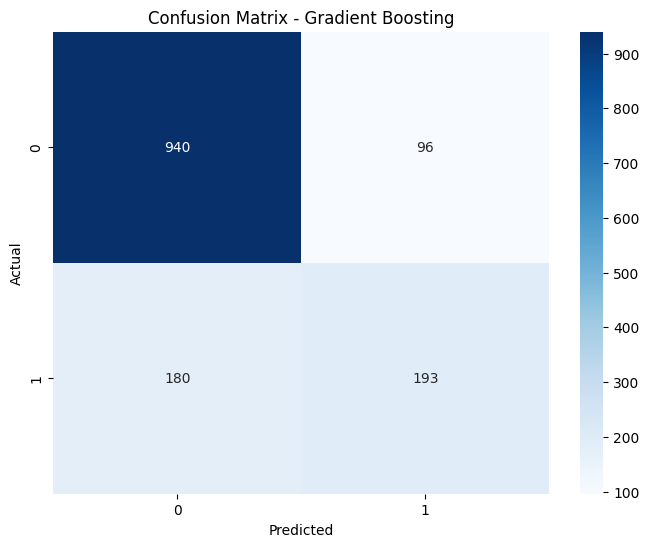

In [ ]:

for name, result in results.items():
    plt.figure(figsize=(8, 6))
    sns.heatmap(result['conf_matrix'], annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()


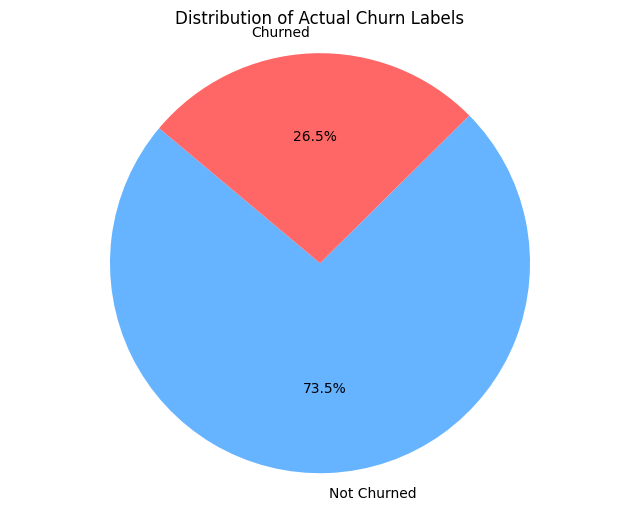

In [ ]:

churn_counts = y_test.value_counts()
labels = ['Not Churned', 'Churned']
colors = ['#66b3ff', '#ff6666']

plt.figure(figsize=(8, 6))
plt.pie(churn_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Actual Churn Labels')
plt.axis('equal')
plt.show()


In [ ]:
print(f'Best Accuracy: {best_model_accuracy:.2f}')


Best Accuracy: 0.82
